In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')

from plot_chain import plot_single, plot_triple
%matplotlib inline

from run_error_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [349]:
def initialize(param_file = None):
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    b = 2.0
    if 'b' in params: b = params['b']
    f = 0.74
    if 'f' in params: f = params['f']
    s = 3.5
    if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    print '-----------------------------------'
    print ' Run Error Analaysis'
    print '-----------------------------------'
    print ' parameter setting'
    print ' b={} f={} s={} nn={}'.format(b,f,s,nn)
    print ' free params :'+ str(parameter_names[parameter_ind]) 
    print ' k = [{}, {}], kN={}'.format(kmin, kmax, kN)
    print ' r = [{}, {}], rN={}'.format(rmin, rmax, rN)
    print ' lmax={}'.format(lmax)
    print '-----------------------------------'

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    Covariance_matrix(params, RSDPower)
    return params, RSDPower

In [350]:
params, RSDPower = initialize(param_file = 'yaml/default_kN200_ke-3_rN180_re-3_bfs_02.yaml')

-----------------------------------
 Run Error Analaysis
-----------------------------------
 parameter setting
 b=2.0 f=0.74 s=3.5 nn=0.0003
 free params :['b' 'f' 's']
 k = [0.001, 2.0], kN=200
 r = [0.001, 180], rN=181
 lmax=2
-----------------------------------
cov_P  : multiprocessing 100 % 
cov_Xi : multiprocessing 100 %
cov_PXi: multiprocessing 100 %

In [222]:
RSDPower.kmin.min()

0.001

In [208]:
# direct fourier
dxib, dxif, dxis = RSDPower.derivative_bfs(0)

In [209]:
# indirect fourier
dxib2, dxif2, dxis2 = RSDPower._derivative_bfs(0)

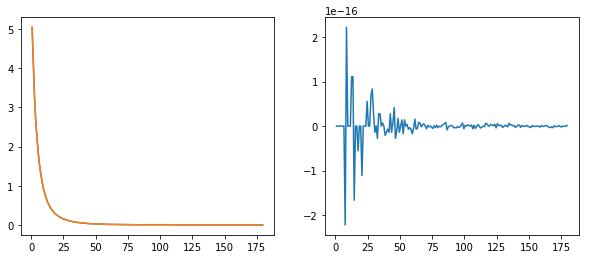

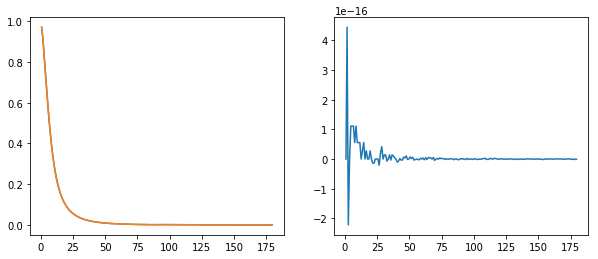

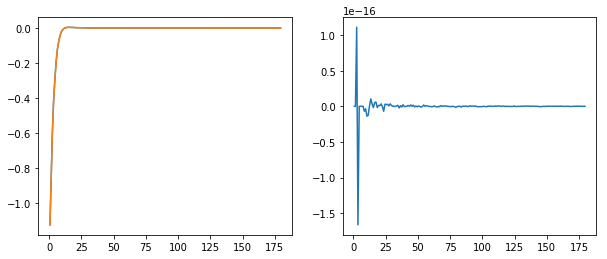

In [210]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,4))
ax.plot(RSDPower.rcenter, dxib)
ax.plot(RSDPower.rcenter, dxib2)
ax2.plot(RSDPower.rcenter, dxib - dxib2)

fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,4))
ax.plot(RSDPower.rcenter, dxif)
ax.plot(RSDPower.rcenter, dxif2)
ax2.plot(RSDPower.rcenter, dxif - dxif2)

fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,4))
ax.plot(RSDPower.rcenter, dxis)
ax.plot(RSDPower.rcenter, dxis2)
ax2.plot(RSDPower.rcenter, dxis - dxis2)

In [211]:
k = RSDPower.kcenter_y
r = RSDPower.rcenter

P0 = RSDPower.multipole_P(0)
X0 = RSDPower.multipole_Xi(0)

P2 = RSDPower.multipole_P(2)
X2 = RSDPower.multipole_Xi(2)

P4 = RSDPower.multipole_P(4)
X4 = RSDPower.multipole_Xi(4)

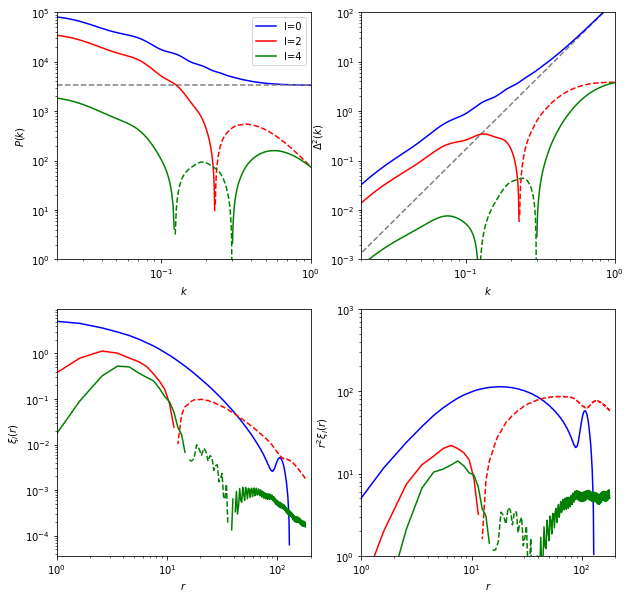

In [212]:
fac = k**3/(2*np.pi**2)
fig, ((ax, ax2),(ax3,ax4))= plt.subplots(2,2, figsize=(10,10))
#ax.loglog(kmatter, Pmatter)
ax.loglog(k, P0, color = 'b', label = 'l=0')
ax.axhline(y=1./0.0003, color='grey', linestyle='--')
ax.loglog(k, P2, 'r-',label = 'l=2')
ax.loglog(k, -P2, 'r--')
ax.loglog(k, P4, 'g-',label = 'l=4')
ax.loglog(k, -P4, 'g--')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)$')
ax.set_xlim(0.02, 1)
ax.set_ylim(1, 100000)


fac = k**3/(2*np.pi**2)
#fig, (ax, ax2) = plt.subplots(2,1, figsize=(6,10))
#ax.loglog(kmatter, Pmatter)
ax2.loglog(k, 1./0.0003*fac, color='grey', linestyle='--')
ax2.loglog(k, fac*P0, color = 'b', label = 'l=0')
ax2.loglog(k, fac*P2, 'r-',label = 'l=2')
ax2.loglog(k, -P2*fac, 'r--')
ax2.loglog(k, P4*fac, 'g-',label = 'l=4')
ax2.loglog(k, -P4*fac, 'g--')
ax2.set_xlabel(r'$k$')
ax2.set_ylabel(r'$\Delta^2(k)$')
ax2.set_xlim(0.02, 1)
ax2.set_ylim(0.001, 100)

ax3.loglog(r, X0, 'b')
ax3.loglog(r, X2, 'r-')
ax3.loglog(r, -X2, 'r--')
ax3.loglog(r, X4, 'g-')
ax3.loglog(r, -X4, 'g--')
ax3.set_xlim(1, 200)
#ax3.set_ylim(1,1000)
ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$\xi_l(r)$')

ax4.loglog(r, r**2*X0, 'b')
ax4.loglog(r, r**2*X2, 'r-')
ax4.loglog(r, -r**2*X2, 'r--')
ax4.loglog(r, r**2*X4, 'g-')
ax4.loglog(r, -r**2*X4, 'g--')
ax4.set_xlim(1, 200)
ax4.set_ylim(1,1000)
ax4.set_xlabel(r'$r$')
ax4.set_ylabel(r'$r^2\xi_l(r)$')

ax.legend(loc='best')

In [229]:
#direct
covPX = np.log10(RSDPower.covariance_PXi(0,0))
covPX_2 = np.log10(RSDPower._covariance_PXi(0,0))

/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


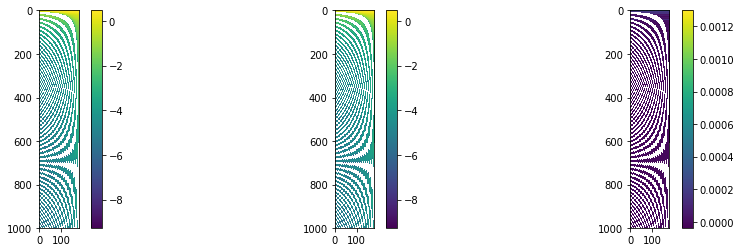

In [231]:
fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize = (15, 4))
im=ax.imshow(covPX)
im2=ax2.imshow(covPX_2)
im3=ax3.imshow(covPX - covPX_2)

fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

In [200]:
RSDPower.RSDband_covariance_PP_all()

cov_P  : multiprocessing 100 %


In [201]:
RSDPower.covP24_interp

In [202]:
RSDPower.covariance_PP(2,2)

array([[  6.47598395e+09,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   4.03079081e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.90767177e+09, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          5.52036120e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   5.50926022e+01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.49819267e+01]])

In [213]:
RSDPower.covariance_PXi_All()


cov_PXi: multiprocessing 100 %

In [214]:
Vk = 4./3*np.pi*(RSDPower.kmax_y**3 - RSDPower.kmin_y**3)
Vfactor = 4*np.pi*RSDPower.kcenter_y**2/Vk
covP00 = RSDPower.covariance_PP00.diagonal() * Vk
covP00_interp = RSDPower.covP00_interp(RSDPower.kcenter_y)*4*np.pi*RSDPower.kcenter_y**2

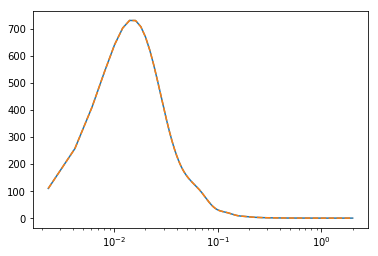

In [215]:
fig, ax = plt.subplots()
ax.semilogx(RSDPower.kcenter_y, covP00)
ax.semilogx(RSDPower.kcenter_y, covP00_interp, '--')

In [563]:
def InitiateClass(b=2.0, f=0.74, s=3.5):
    param_file = 'yaml/default_kN200_ke-3_rN180_re-3_bfs_02.yaml'
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    #kN = 500
    #rN = 300
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    #b = 2.0
    #if 'b' in params: b = params['b']
    #f = 0.74
    #if 'f' in params: f = params['f']
    #s = 3.5
    #if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    
  
    Covariance_matrix(params, RSDPower)
    #RSDPower.MatterPower()
    ##return RSDPower.multipole_P(0), RSDPower.multipole_P(2),
    return RSDPower

In [564]:
def Multipoles(b=2.0, f=0.74, s=3.5):
    param_file = 'yaml/default_kN200_ke-3_rN180_re-3_bfs_02.yaml'
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    #kN = 500
    #rN = 300
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    #b = 2.0
    #if 'b' in params: b = params['b']
    #f = 0.74
    #if 'f' in params: f = params['f']
    #s = 3.5
    #if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    
  
    #Covariance_matrix(params, RSDPower)
    RSDPower.MatterPower()
    return [RSDPower.multipole_P(0), RSDPower.multipole_P(2),RSDPower.multipole_P(4)]
    

In [565]:
def Multipoles_xi(b=2.0, f=0.74, s=3.5):
    param_file = 'yaml/default_kN200_ke-3_rN180_re-3_bfs_02.yaml'
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    #rN = 300
    #kN = 500
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    #b = 2.0
    #if 'b' in params: b = params['b']
    #f = 0.74
    #if 'f' in params: f = params['f']
    #s = 3.5
    #if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    
  
    #Covariance_matrix(params, RSDPower)
    RSDPower.MatterPower()
    RSDPower.multipole_P(0)
    RSDPower.multipole_P(2)
    RSDPower.multipole_P(4)
    
    return [RSDPower.multipole_Xi(0), RSDPower.multipole_Xi(2), RSDPower.multipole_Xi(4)]
    

In [539]:
RSDPower = InitiateClass()

cov_P  : multiprocessing 100 % 
cov_Xi : multiprocessing 100 %
cov_PXi: multiprocessing 100 %

In [557]:
def dPdb_derivative(db=0.01):
    b_model = 2.0
    P0_data, P2_data, P4_data = Multipoles(b=b_model+db)
    P0_model, P2_model, P4_model = Multipoles(b=b_model)
    print b_model + db
    dPdb0 = (P0_data - P0_model)/db
    dPdb2 = (P2_data - P2_model)/db
    dPdb4 = (P4_data - P4_model)/db
    return [dPdb0, dPdb2, dPdb4]
def dPdf_derivative(df=0.01):
    f_model = 0.74
    P0_data, P2_data, P4_data = Multipoles(f=f_model+df)
    P0_model, P2_model, P4_model = Multipoles(f=f_model)
    print f_model + df
    dPdf0 = (P0_data - P0_model)/df
    dPdf2 = (P2_data - P2_model)/df
    dPdf4 = (P4_data - P4_model)/df
    return [dPdf0, dPdf2, dPdf4]
def dPds_derivative(ds=0.01):
    s_model = 3.5
    P0_data, P2_data, P4_data = Multipoles(s=s_model+ds)
    P0_model, P2_model, P4_model = Multipoles(s=s_model)
    print s_model + ds
    dPds0 = (P0_data - P0_model)/ds
    dPds2 = (P2_data - P2_model)/ds
    dPds4 = (P4_data - P4_model)/ds
    return [dPds0, dPds2, dPds4]


def dxidb_derivative(db=0.01):
    b_model = 2.0
    P0_data, P2_data, P4_data = Multipoles_xi(b=b_model+db)
    P0_model, P2_model, P4_model = Multipoles_xi(b=b_model)
    print b_model + db
    dPdb0 = (P0_data - P0_model)/db
    dPdb2 = (P2_data - P2_model)/db
    dPdb4 = (P4_data - P4_model)/db
    return [dPdb0, dPdb2, dPdb4]
def dxidf_derivative(df=0.01):
    f_model = 0.74
    P0_data, P2_data, P4_data = Multipoles_xi(f=f_model+df)
    P0_model, P2_model, P4_model = Multipoles_xi(f=f_model)
    print f_model + df
    dPdf0 = (P0_data - P0_model)/df
    dPdf2 = (P2_data - P2_model)/df
    dPdf4 = (P4_data - P4_model)/df
    return [dPdf0, dPdf2, dPdf4]
def dxids_derivative(ds=0.01):
    s_model = 3.5
    P0_data, P2_data, P4_data = Multipoles_xi(s=s_model+ds)
    P0_model, P2_model, P4_model = Multipoles_xi(s=s_model)
    print s_model + ds
    dPds0 = (P0_data - P0_model)/ds
    dPds2 = (P2_data - P2_model)/ds
    dPds4 = (P4_data - P4_model)/ds
    return [dPds0, dPds2, dPds4]

In [558]:
dPdb_direct, dPdf_direct, dPds_direct = RSDPower.derivative_P_bfs(0)
dPdb2_direct, dPdf2_direct, dPds2_direct = RSDPower.derivative_P_bfs(2)

dPdb  = np.hstack([dPdb_derivative(db=0.01)]).ravel()
dPdf  = np.hstack([dPdf_derivative(df=0.01)]).ravel()
dPds  = np.hstack([dPds_derivative(ds=0.01)]).ravel()
derivative_P_numeric_bfs = np.vstack([dPdb, dPdf, dPds])
np.savetxt('data_txt/datav/default_kN200_ke-3_rN180_re-3_bfs_p02_params_numeric.datavector',derivative_P_numeric_bfs)

2.01
0.75
3.51


In [560]:
dxidb  = np.hstack([dxidb_derivative(db=0.01)]).ravel()
dxidf  = np.hstack([dxidf_derivative(df=0.01)]).ravel()
dxids  = np.hstack([dxids_derivative(ds=0.01)]).ravel()
derivative_xi_numeric_bfs = np.vstack([dxidb, dxidf, dxids])
np.savetxt('data_txt/datav/default_kN200_ke-3_rN180_re-3_bfs_p02_params_xi_numeric.datavector',derivative_xi_numeric_bfs)

2.01
0.75
3.51


In [552]:
dxidb_analytic = np.genfromtxt('data_txt/datav/default_kN200_ke-3_rN180_re-3_bfs_p02_params.datavector')

In [561]:
dxidb_analytic.shape, derivative_P_numeric_bfs.shape

((4, 597), (3, 597))

In [546]:
derivative_P_numeric_bfs.shape

(3, 398)

2.01
2.5
0.75
1.24
3.51
4.0


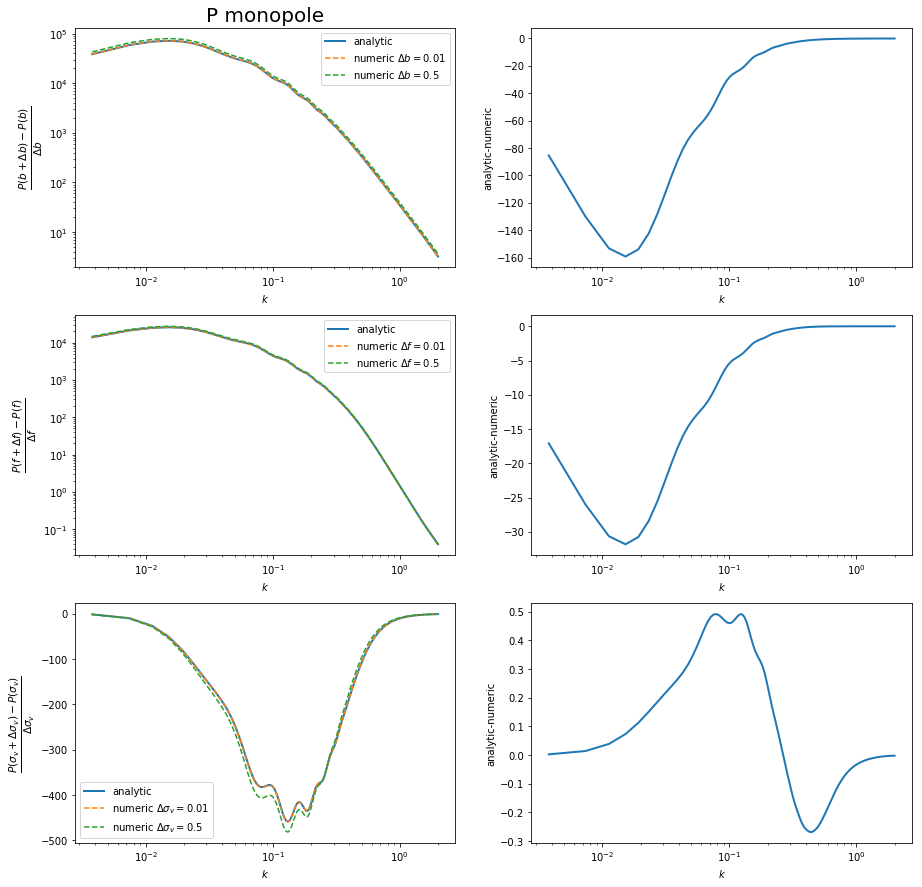

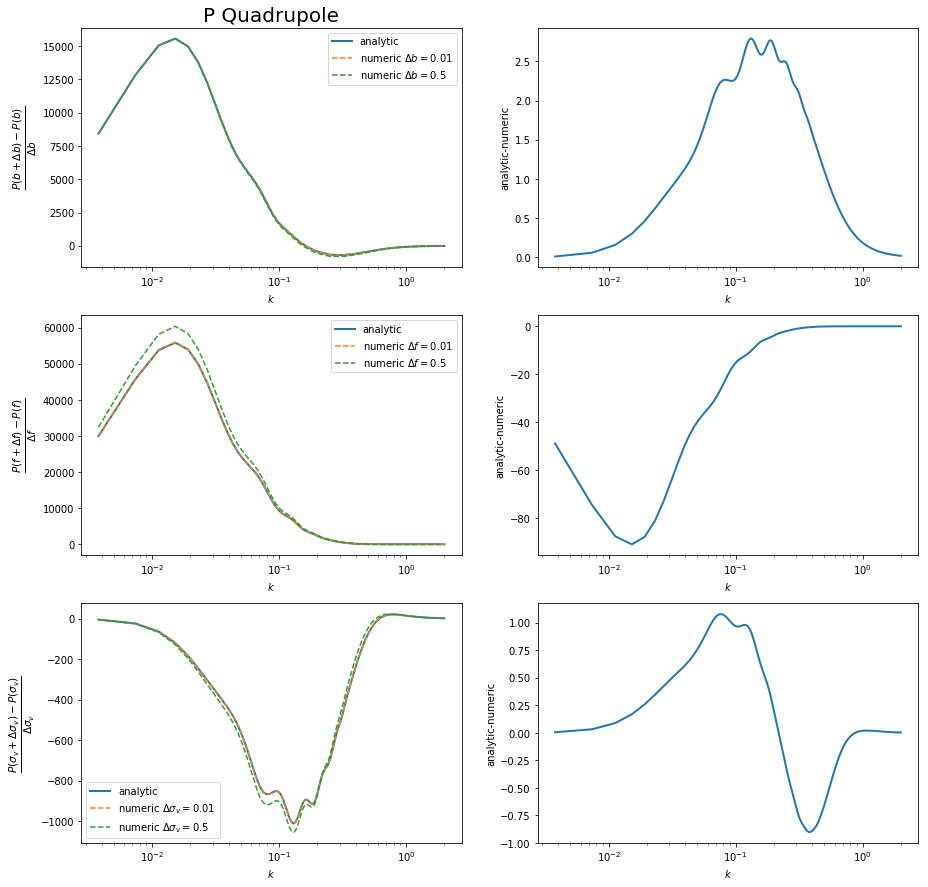

In [533]:
dPdb_direct, dPdf_direct, dPds_direct = RSDPower.derivative_P_bfs(0)
dPdb2_direct, dPdf2_direct, dPds2_direct = RSDPower.derivative_P_bfs(2)
#dPdb0, dPdb2 = dPdb_derivative(db=0.1)
dPdb0, dPdb2  = dPdb_derivative(db=0.01)
dPdb0_1, dPdb2_1  = dPdb_derivative(db=0.5)

#dPdf = dPdf_derivative(df=0.1)
dPdf0, dPdf2 = dPdf_derivative(df=0.01)
dPdf0_1, dPdf2_1 = dPdf_derivative(df=0.5)

#dPds = dPds_derivative(ds=0.1)
dPds0, dPds2 = dPds_derivative(ds=0.01)
dPds0_1, dPds2_1 = dPds_derivative(ds=0.5)

fig, ((ax, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3,2, figsize=(15,15))
ax.loglog(RSDPower.kcenter_y, dPdb_direct, lw=2.0, label='analytic')
ax.loglog(RSDPower.kcenter_y, dPdb0, '--',label=r'numeric $\Delta b=0.01$')
ax.loglog(RSDPower.kcenter_y, dPdb0_1, '--',label=r'numeric $\Delta b=0.5$')
ax.legend(loc='best')

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\frac{P(b+\Delta b)-P(b)}{\Delta b}$', fontsize = 15)

ax.set_title('P monopole', fontsize=20)




ax2.loglog(RSDPower.kcenter_y, dPdf_direct, lw=2.0, label='analytic')
ax2.loglog(RSDPower.kcenter_y, dPdf0, '--',label=r'numeric $\Delta f=0.01$')
ax2.loglog(RSDPower.kcenter_y, dPdf0_1, '--',label=r'numeric $\Delta f=0.5$')
ax2.legend(loc='best')

ax2.set_xlabel(r'$k$')
ax2.set_ylabel(r'$\frac{P(f+\Delta f)-P(f)}{\Delta f}$', fontsize = 15)





ax3.semilogx(RSDPower.kcenter_y, dPds_direct, lw=2.0, label='analytic')
ax3.semilogx(RSDPower.kcenter_y, dPds0, '--',label=r'numeric $\Delta \sigma_v=0.01$')
ax3.semilogx(RSDPower.kcenter_y, dPds0_1, '--',label=r'numeric $\Delta \sigma_v=0.5$')
ax3.legend(loc='best')

ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$\frac{P(\sigma_v+\Delta\sigma_v)-P(\sigma_v)}{\Delta \sigma_v}$', 
               fontsize = 15)


ax4.semilogx(RSDPower.kcenter_y, dPdb_direct-dPdb0, lw=2.0)
ax4.set_xlabel(r'$k$')
ax4.set_ylabel('analytic-numeric')

ax5.semilogx(RSDPower.kcenter_y, dPdf_direct-dPdf0, lw=2.0)
ax5.set_xlabel(r'$k$')
ax5.set_ylabel('analytic-numeric')

ax6.semilogx(RSDPower.kcenter_y, dPds_direct-dPds0, lw=2.0)
ax6.set_xlabel(r'$k$')
ax6.set_ylabel('analytic-numeric')



################# l = 2

fig, ((ax, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3,2, figsize=(15,15))
ax.semilogx(RSDPower.kcenter_y, dPdb2_direct, lw=2.0, label='analytic')
ax.semilogx(RSDPower.kcenter_y, dPdb2, '--',label=r'numeric $\Delta b=0.01$')
ax.semilogx(RSDPower.kcenter_y, dPdb2_1, '--',label=r'numeric $\Delta b=0.5$')
ax.legend(loc='best')

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\frac{P(b+\Delta b)-P(b)}{\Delta b}$', fontsize = 15)

ax.set_title('P Quadrupole', fontsize=20)

ax2.semilogx(RSDPower.kcenter_y, dPdf2_direct, lw=2.0, label='analytic')
ax2.semilogx(RSDPower.kcenter_y, dPdf2, '--',label=r'numeric $\Delta f=0.01$')
ax2.semilogx(RSDPower.kcenter_y, dPdf2_1, '--',label=r'numeric $\Delta f=0.5$')
ax2.legend(loc='best')

ax2.set_xlabel(r'$k$')
ax2.set_ylabel(r'$\frac{P(f+\Delta f)-P(f)}{\Delta f}$', fontsize = 15)


ax3.semilogx(RSDPower.kcenter_y, dPds2_direct, lw=2.0, label='analytic')
ax3.semilogx(RSDPower.kcenter_y, dPds2, '--',label=r'numeric $\Delta \sigma_v=0.01$')
ax3.semilogx(RSDPower.kcenter_y, dPds2_1, '--',label=r'numeric $\Delta \sigma_v=0.5$')
ax3.legend(loc='best')

ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$\frac{P(\sigma_v+\Delta\sigma_v)-P(\sigma_v)}{\Delta \sigma_v}$', 
               fontsize = 15)


ax4.semilogx(RSDPower.kcenter_y, dPdb2_direct-dPdb2, lw=2.0)
ax4.set_xlabel(r'$k$')
ax4.set_ylabel('analytic-numeric')

ax5.semilogx(RSDPower.kcenter_y, dPdf2_direct-dPdf2, lw=2.0)
ax5.set_xlabel(r'$k$')
ax5.set_ylabel('analytic-numeric')

ax6.semilogx(RSDPower.kcenter_y, dPds2_direct-dPds2, lw=2.0)
ax6.set_xlabel(r'$k$')
ax6.set_ylabel('analytic-numeric')

2.01
2.5
0.75
1.24
3.51
4.0


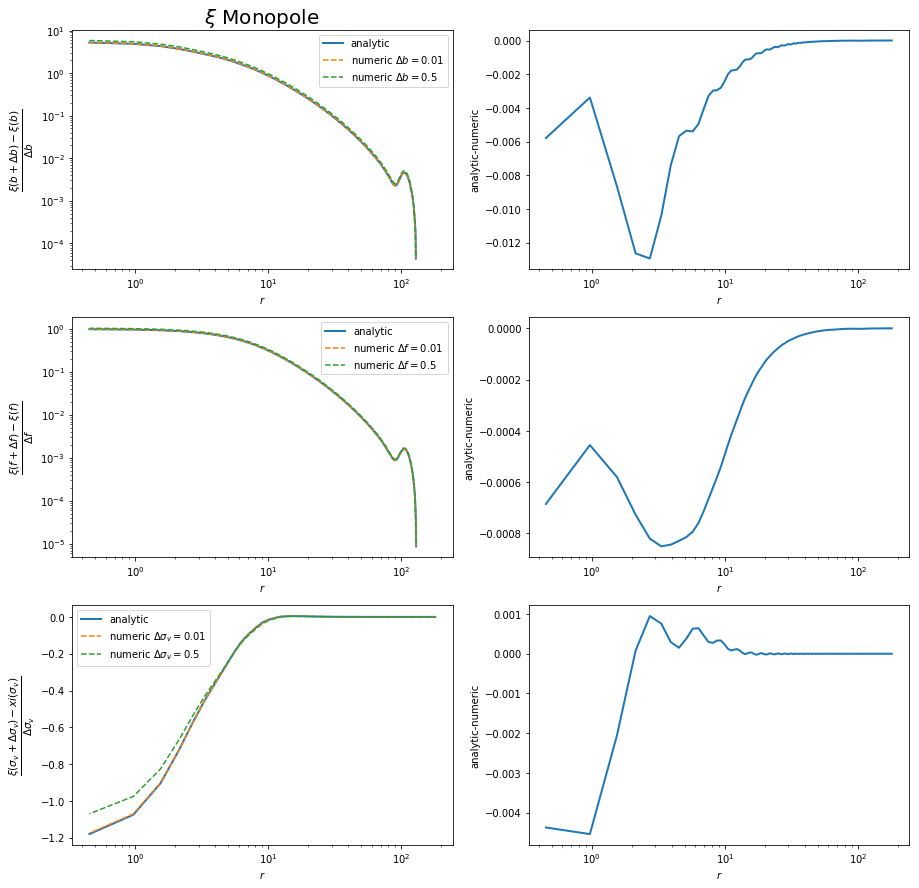

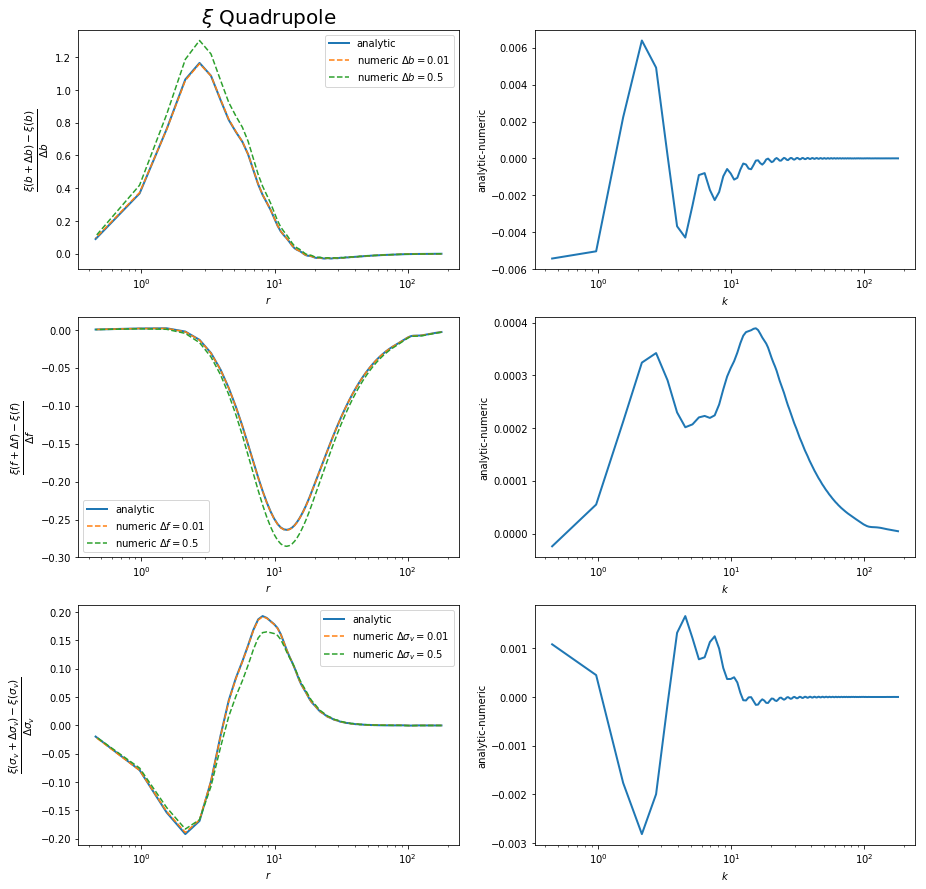

In [535]:
dPdb_direct, dPdf_direct, dPds_direct = RSDPower.derivative_bfs(0)
dPdb2_direct, dPdf2_direct, dPds2_direct = RSDPower.derivative_bfs(2)
#dPdb0, dPdb2 = dPdb_derivative(db=0.1)
dPdb0, dPdb2  = dxidb_derivative(db=0.01)
dPdb0_1, dPdb2_1  = dxidb_derivative(db=0.5)

#dPdf = dPdf_derivative(df=0.1)
dPdf0, dPdf2 = dxidf_derivative(df=0.01)
dPdf0_1, dPdf2_1 = dxidf_derivative(df=0.5)

#dPds = dPds_derivative(ds=0.1)
dPds0, dPds2 = dxids_derivative(ds=0.01)
dPds0_1, dPds2_1 = dxids_derivative(ds=0.5)

fig, ((ax, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3,2, figsize=(15,15))
ax.loglog(RSDPower.rcenter, dPdb_direct, lw=2.0, label='analytic')
ax.loglog(RSDPower.rcenter, dPdb0, '--',label=r'numeric $\Delta b=0.01$')
ax.loglog(RSDPower.rcenter, dPdb0_1, '--',label=r'numeric $\Delta b=0.5$')
ax.legend(loc='best')

ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\frac{\xi(b+\Delta b)-\xi(b)}{\Delta b}$', fontsize = 15)

ax.set_title(r'$\xi$ Monopole', fontsize=20)

ax2.loglog(RSDPower.rcenter, dPdf_direct, lw=2.0, label='analytic')
ax2.loglog(RSDPower.rcenter, dPdf0, '--',label=r'numeric $\Delta f=0.01$')
ax2.loglog(RSDPower.rcenter, dPdf0_1, '--',label=r'numeric $\Delta f=0.5$')
ax2.legend(loc='best')

ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$\frac{\xi(f+\Delta f)-\xi(f)}{\Delta f}$', fontsize = 15)


ax3.semilogx(RSDPower.rcenter, dPds_direct, lw=2.0, label='analytic')
ax3.semilogx(RSDPower.rcenter, dPds0, '--',label=r'numeric $\Delta \sigma_v=0.01$')
ax3.semilogx(RSDPower.rcenter, dPds0_1, '--',label=r'numeric $\Delta \sigma_v=0.5$')
ax3.legend(loc='best')

ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$\frac{\xi(\sigma_v+\Delta\sigma_v)-xi(\sigma_v)}{\Delta \sigma_v}$', 
               fontsize = 15)


ax4.semilogx(RSDPower.rcenter, dPdb_direct-dPdb0, lw=2.0)
ax4.set_xlabel(r'$r$')
ax4.set_ylabel('analytic-numeric')

ax5.semilogx(RSDPower.rcenter, dPdf_direct-dPdf0, lw=2.0)
ax5.set_xlabel(r'$r$')
ax5.set_ylabel('analytic-numeric')

ax6.semilogx(RSDPower.rcenter, dPds_direct-dPds0, lw=2.0)
ax6.set_xlabel(r'$r$')
ax6.set_ylabel('analytic-numeric')


################# l = 2

fig, ((ax, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3,2, figsize=(15,15))
ax.semilogx(RSDPower.rcenter, dPdb2_direct, lw=2.0, label='analytic')
ax.semilogx(RSDPower.rcenter, dPdb2, '--',label=r'numeric $\Delta b=0.01$')
ax.semilogx(RSDPower.rcenter, dPdb2_1, '--',label=r'numeric $\Delta b=0.5$')
ax.legend(loc='best')

ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\frac{\xi(b+\Delta b)-\xi(b)}{\Delta b}$', fontsize = 15)

ax.set_title(r'$\xi$ Quadrupole', fontsize=20)

ax2.semilogx(RSDPower.rcenter, dPdf2_direct, lw=2.0, label='analytic')
ax2.semilogx(RSDPower.rcenter, dPdf2, '--',label=r'numeric $\Delta f=0.01$')
ax2.semilogx(RSDPower.rcenter, dPdf2_1, '--',label=r'numeric $\Delta f=0.5$')
ax2.legend(loc='best')

ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$\frac{\xi(f+\Delta f)-\xi(f)}{\Delta f}$', fontsize = 15)


ax3.semilogx(RSDPower.rcenter, dPds2_direct, lw=2.0, label='analytic')
ax3.semilogx(RSDPower.rcenter, dPds2, '--',label=r'numeric $\Delta \sigma_v=0.01$')
ax3.semilogx(RSDPower.rcenter, dPds2_1, '--',label=r'numeric $\Delta \sigma_v=0.5$')
ax3.legend(loc='best')

ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$\frac{\xi(\sigma_v+\Delta\sigma_v)-\xi(\sigma_v)}{\Delta \sigma_v}$', 
               fontsize = 15)


ax4.semilogx(RSDPower.rcenter, dPdb2_direct-dPdb2, lw=2.0)
ax4.set_xlabel(r'$k$')
ax4.set_ylabel('analytic-numeric')

ax5.semilogx(RSDPower.rcenter, dPdf2_direct-dPdf2, lw=2.0)
ax5.set_xlabel(r'$k$')
ax5.set_ylabel('analytic-numeric')

ax6.semilogx(RSDPower.rcenter, dPds2_direct-dPds2, lw=2.0)
ax6.set_xlabel(r'$k$')
ax6.set_ylabel('analytic-numeric')

In [581]:
def Multipoles_xi_dP(dP = 0.1):
    param_file = 'yaml/default_kN200_ke-3_rN180_re-3_bfs_02.yaml'
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    #rN = 300
    #kN = 500
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    b = 2.0
    #if 'b' in params: b = params['b']
    f = 0.74
    #if 'f' in params: f = params['f']
    s = 3.5
    #if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    
  
    #Covariance_matrix(params, RSDPower)'
    RSDPower.multipole_P_band_all()
    #RSDPower.MatterPower()
    #RSDPower.multipole_P(0)
    #RSDPower.multipole_P(2)
    #RSDPower.multipole_P(4)
    
    RSDPower.multipole_bandpower0 = RSDPower.multipole_bandpower0 + dP
    return [RSDPower.multipole_Xi(0), RSDPower.multipole_Xi(2), RSDPower.multipole_Xi(4)]
    

In [584]:
def dxidP_derivative(dP = 0.1):
    
    Xi0_model, Xi2_model, Xi4_model = Multipoles_xi_dP(dP = 0.0)
    Xi0_data, Xi2_data, Xi4_data = Multipoles_xi_dP(dP = 0.1)

    P0_model, P2_model, P4_model = Multipoles()

    dPdb0 = (Xi0_data - Xi0_model)/dP
    dPdb2 = (Xi2_data - Xi2_model)/dP
    dPdb4 = (Xi4_data - Xi4_model)/dP
    return [dPdb0, dPdb2, dPdb4]

In [577]:
RSDPower = InitiateClass()

cov_P  : multiprocessing 100 % 
cov_Xi : multiprocessing 100 %
cov_PXi: multiprocessing 100 %

In [597]:
P0_data, P2_data, P4_data = Multipoles()
Xi0_model, Xi2_model, Xi4_model = Multipoles_xi_dP(dP = 0.0)
Xi0_data, Xi2_data, Xi4_data = Multipoles_xi_dP(dP = 1e4)


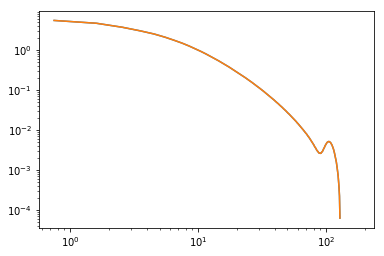

In [598]:
fig, ax = plt.subplots()
ax.loglog(RSDPower.rcenter, Xi0_data)
ax.loglog(RSDPower.rcenter, Xi0_model)

In [591]:
dPdb0, dPdb2, dPdb4 = dxidP_derivative(dP = 100)

In [593]:
dPdb0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

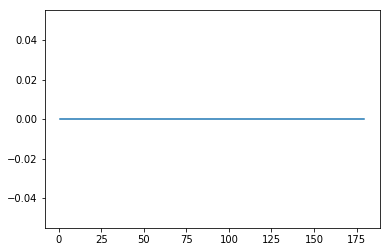

In [592]:
fig, ax = plt.subplots()
ax.plot(RSDPower.rcenter, dPdb0)